# Conditional Workflow

In [50]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [30]:
class QuadraticState(TypedDict):
    a: int
    b: int
    c: int

    equation: str
    discriminant: float
    result: str

In [31]:
def show_equation(state: QuadraticState):
    return {
        "equation": f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"
    }


In [51]:
def calculate_discriminant(state: QuadraticState):
    return {
        "discriminant": state['b']**2 - 4*state['a']*state['c']
    }


In [53]:
def check_discriminant(state: QuadraticState) -> Literal["caluclate_real_roots", "calculate_repeated_roots", "calculate_no_real_roots"]:
    if state['discriminant'] > 0:
        return "caluclate_real_roots"
    elif state['discriminant'] == 0:
        return "calculate_repeated_roots"
    else:
        return "calculate_no_real_roots"

In [54]:
def caluclate_real_roots(state: QuadraticState):
    root1 = (-state["b"] + state["discriminant"]**0.5)/(2*state["a"])
    root2 = (-state["b"] - state["discriminant"]**0.5)/(2*state["a"])
    result = f"The roots are {root1} and {root2}"
    return {"result": result}

def calculate_repeated_roots(state: QuadraticState):
    root = (-state["b"])/(2*state["a"])
    result = f"The root is {root}"
    return {"result": result}

def calculate_no_real_roots(state: QuadraticState):
    result = "The equation has no real roots"
    return {"result": result}

In [55]:
graph = StateGraph(QuadraticState)

graph.add_node("Show_Equation",show_equation)
graph.add_node("calculate_discriminant",calculate_discriminant)
graph.add_node("caluclate_real_roots",caluclate_real_roots)
graph.add_node("calculate_repeated_roots",calculate_repeated_roots)
graph.add_node("calculate_no_real_roots",calculate_no_real_roots)


graph.add_edge(START, 'Show_Equation')
graph.add_edge('Show_Equation', 'calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant',check_discriminant)
graph.add_edge('caluclate_real_roots',END)
graph.add_edge('calculate_repeated_roots',END)
graph.add_edge('calculate_no_real_roots',END)

workflow = graph.compile()

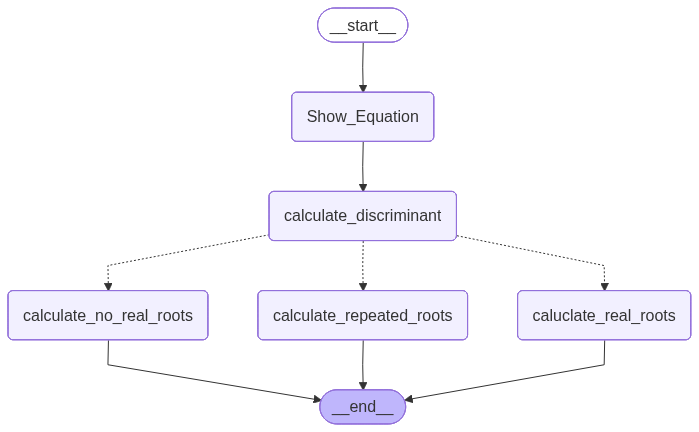

In [56]:
workflow

In [57]:
initial_state = {"a": 1, "b": 2, "c": 1}

workflow.invoke(initial_state)

{'a': 1,
 'b': 2,
 'c': 1,
 'equation': '1x22x1',
 'discriminant': 0,
 'result': 'The root is -1.0'}